# Import Dependencies for clustering Analysis and Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and Preview the Dataset

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Balance: Total miles available for rewards, indicating overall earning.
                              
Qual_miles: Miles toward elite status, reflecting progress toward special membership perks.
                              
cc1_miles: Miles from the frequent flyer card.
                              
cc2_miles: Miles from the rewards card.
    
cc3_miles: Miles from the business card.

Bonus_miles: Extra miles from non-flight activities like shopping, showing engagement with non-travel programs.

Bonus_trans: Number of non-flight transactions where miles were earned.

Flight_miles_12mo: Miles flown in the last 12 months, indicating travel volume.
    
Flight_trans_12: Number of flights taken in the last 12 months.

Days_since_enroll: Duration of customer’s membership, helping to identify new vs. long-term members.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
unique_counts = {col: len(data[col].unique()) for col in data.columns}
print(unique_counts)


{'ID#': 3999, 'Balance': 3904, 'Qual_miles': 164, 'cc1_miles': 5, 'cc2_miles': 3, 'cc3_miles': 5, 'Bonus_miles': 2734, 'Bonus_trans': 57, 'Flight_miles_12mo': 343, 'Flight_trans_12': 35, 'Days_since_enroll': 2820, 'Award?': 2}


In [5]:
data.drop(columns=['ID#','Award?'],inplace=True)

The columns 'ID#' was dropped because it contains unique values for each record and 'Award?' was removed because it is not relevant to our task.

In [6]:
data.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034


In [7]:
data[data.duplicated(keep=False)==True]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
3370,1000,0,1,1,1,0,0,0,0,1597
3876,1000,0,1,1,1,0,0,0,0,1597


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000


Task:
1) flying patterns
2) earning and use of frequent flyer rewards
3) use of the airline credit card

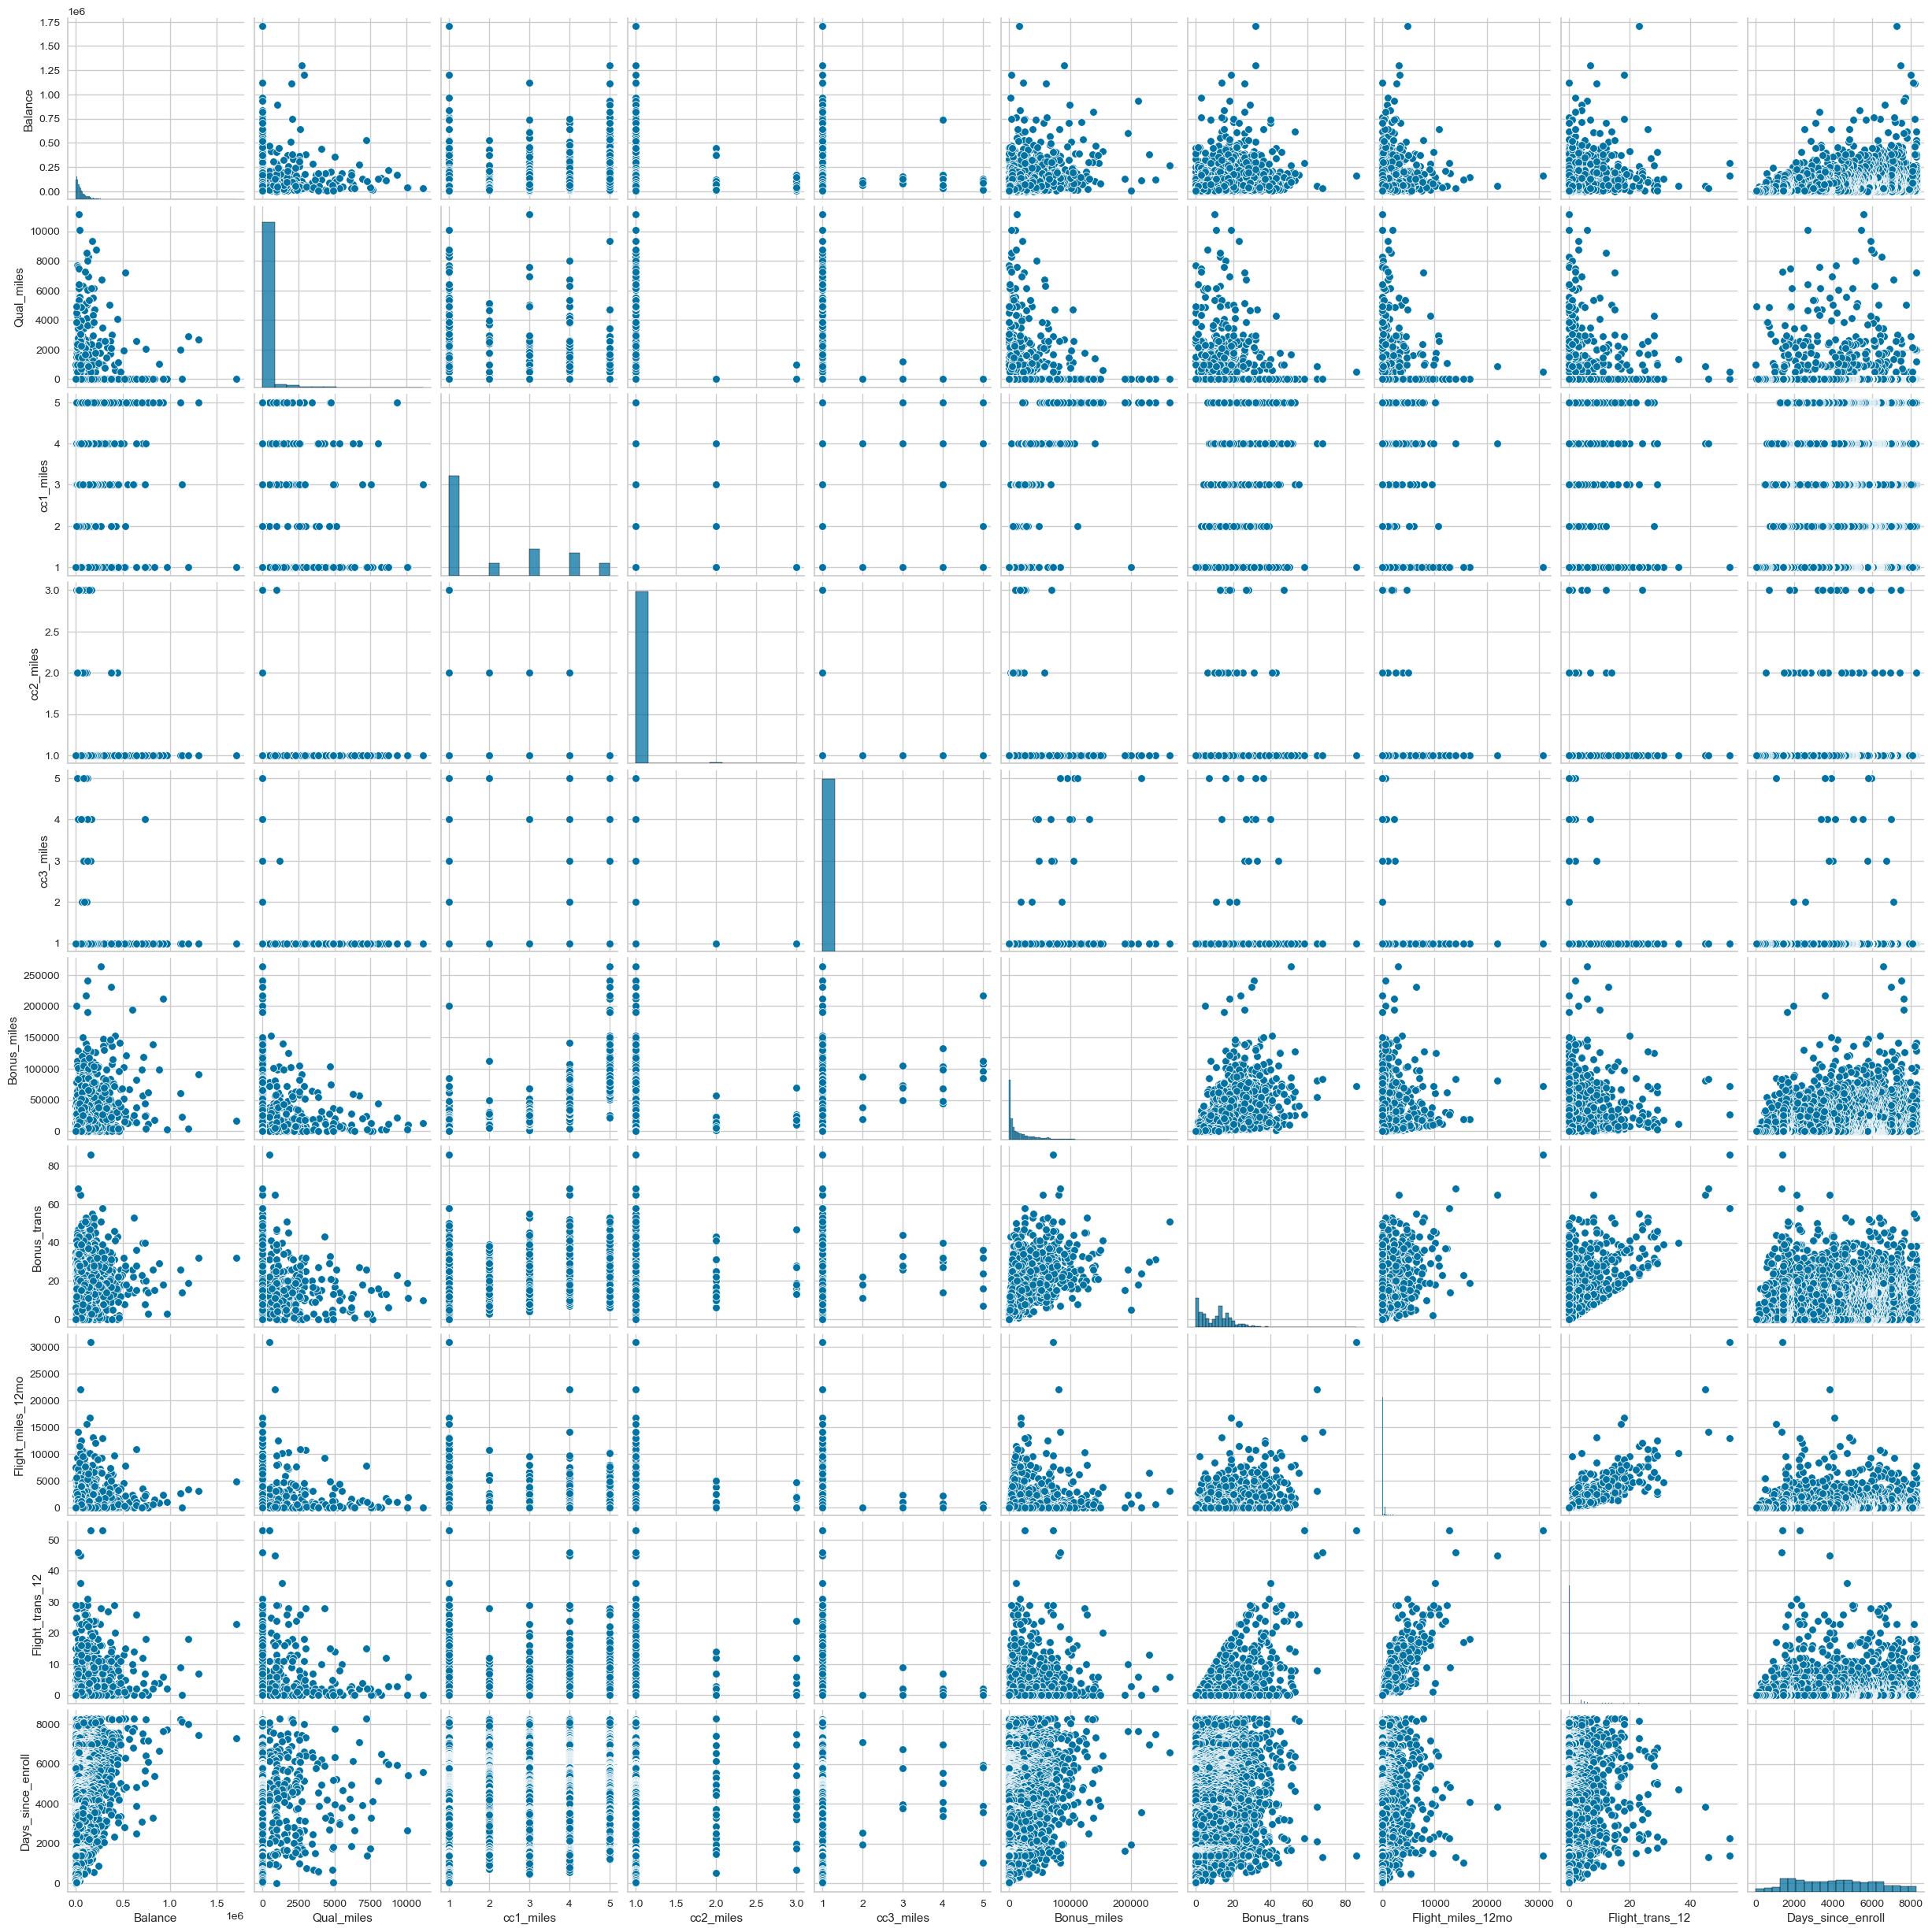

In [10]:
sns.pairplot(data)

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [12]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    sse.append(km.inertia_)

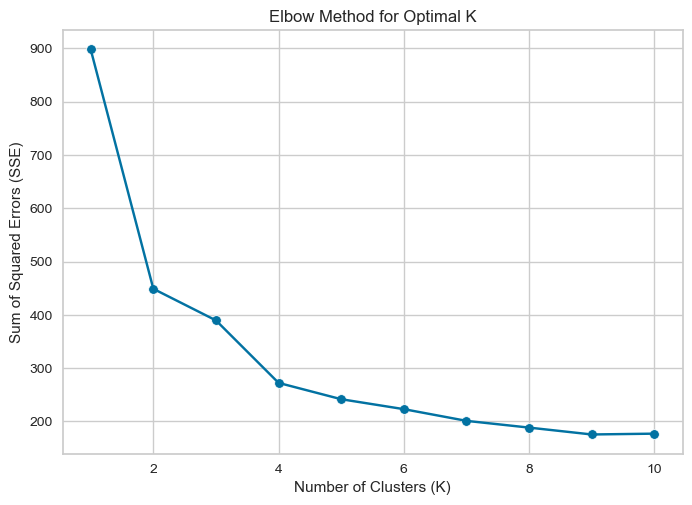

In [13]:
sns.scatterplot(x=k_rng,y=sse)
plt.plot(k_rng,sse)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

The Elbow Method determines the optimal number of clusters for K-Means by plotting the Sum of Squared Errors (SSE) against the number of clusters. The plot shows the SSE decreasing as clusters increase, with the "elbow" point indicating the optimal number of clusters. In this case, 3 or 4 clusters appear optimal.

In [14]:
k_means = KMeans(n_clusters=3)
k_means.fit(scaled_data)

KMeans(n_clusters=3)

In [15]:
y_pred = k_means.fit_predict(scaled_data)
data['Clusters'] = y_pred

In [16]:
data.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1


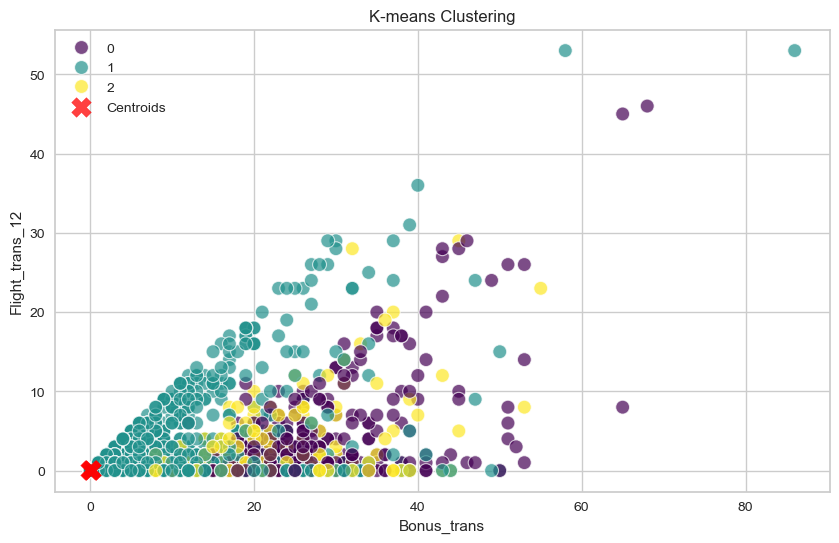

In [17]:

plt.figure(figsize=(10, 6))

# Scatter plot of the data points
sns.scatterplot(x=data['Bonus_trans'], y=data['Flight_trans_12'], data=data, hue=data['Clusters'], palette='viridis', s=100, alpha=0.7)

# Plot the cluster centers
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add titles and labels
plt.title('K-means Clustering')
plt.legend()

In [18]:
score = silhouette_score(scaled_data,y_pred)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3390803853664018


Above 0.5: Strong clustering. The clusters are well-defined, and data points are close to their cluster centers.

Around 0.3-0.5: Moderate clustering. There's some overlap between clusters, and the distinction isn't very clear.

Below 0.3: Weak clustering. The clusters are poorly separated, with many points close to the boundaries.

In [19]:
data['Flight_miles_12mo'].value_counts()

Flight_miles_12mo
0        2722
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: count, Length: 343, dtype: int64

In [20]:
data['Flight_trans_12'].value_counts()

Flight_trans_12
0     2722
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: count, dtype: int64

In [21]:
data['Qual_miles'].value_counts()

Qual_miles
0       3772
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [22]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Clusters'],
      dtype='object')

In [23]:
data_2 = data

In [24]:
data_2.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1


In [25]:
scaled_data_2 = scaler.fit_transform(data_2)
kl = [2,3,4,5,6,7,8,9]
for i in kl:
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_data_2)
    y_pred = k_means.fit_predict(scaled_data)
    score = silhouette_score(scaled_data_2,y_pred)
    print(f"Silhouette Score for cluster {i}: {score}")

Silhouette Score for cluster 2: 0.4308349639991646
Silhouette Score for cluster 3: 0.38925292563461295
Silhouette Score for cluster 4: 0.30643394658086287
Silhouette Score for cluster 5: 0.2798846029118655
Silhouette Score for cluster 6: 0.22014750947149367
Silhouette Score for cluster 7: 0.3456305377695764
Silhouette Score for cluster 8: 0.35042815820796397
Silhouette Score for cluster 9: 0.29390701351344306


The Silhouette Score shows how well-defined clusters are. Higher scores for clusters 2, 3, 5, 7, and 8 suggest good clustering. Lower scores for clusters 4, 6, and 9 indicate less clear clusters. Generally, clusters with higher scores are better.

In [26]:
k_means = KMeans(n_clusters=5)
k_means.fit(scaled_data_2)
y_pred = k_means.fit_predict(scaled_data)
data['Clusters'] = y_pred
score = silhouette_score(scaled_data_2,y_pred)
print(f"Silhouette Score:{score}")

Silhouette Score:0.2446344207625782


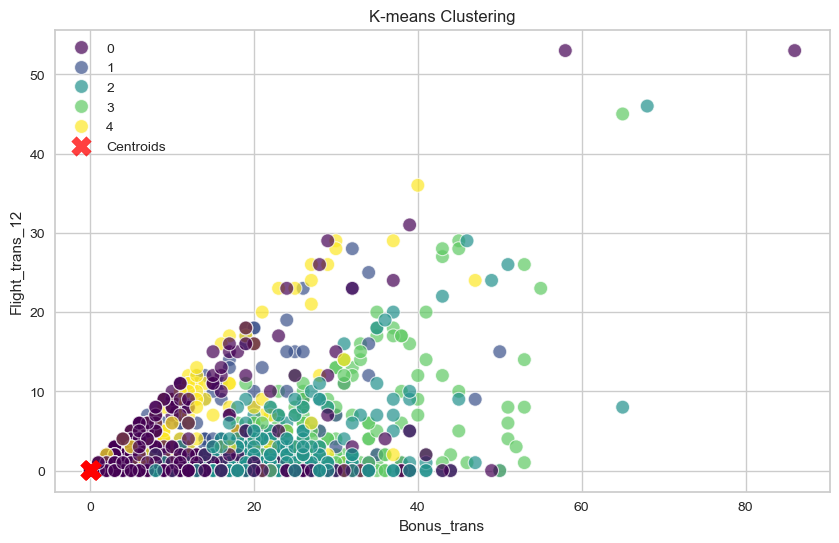

In [27]:

plt.figure(figsize=(10, 6))

# Scatter plot of the data points
sns.scatterplot(x=data['Bonus_trans'], y=data['Flight_trans_12'], data=data, hue=data['Clusters'], palette='viridis', s=100, alpha=0.7)

# Plot the cluster centers
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add titles and labels
plt.title('K-means Clustering')
plt.legend()

<BarContainer object of 5 artists>

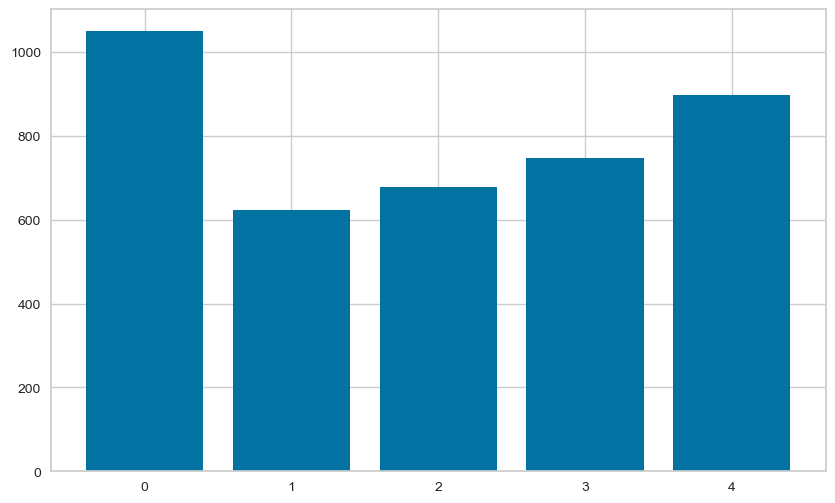

In [28]:
plt.figure(figsize=(10, 6))

plt.bar(data['Clusters'].value_counts().index,data['Clusters'].value_counts())

In [29]:
eps = [0.4,0.5]
samples = [5,10,15,20,25,30]
distance = ['euclidean','manhattan']
for i in eps:
    for j in samples:
        for k in distance: 
            db = DBSCAN(eps=i,min_samples=j,metric=k)
            y_pred = db.fit_predict(scaled_data_2)
            score = silhouette_score(scaled_data_2,y_pred)
            print(f"Silhouette Score for eps {i} & samples {j} and metric {k}: {score}")

Silhouette Score for eps 0.4 & samples 5 and metric euclidean: 0.4748894384511707
Silhouette Score for eps 0.4 & samples 5 and metric manhattan: 0.4793834702212624
Silhouette Score for eps 0.4 & samples 10 and metric euclidean: 0.49359719315753664
Silhouette Score for eps 0.4 & samples 10 and metric manhattan: 0.4774281108349547
Silhouette Score for eps 0.4 & samples 15 and metric euclidean: 0.4902076471692659
Silhouette Score for eps 0.4 & samples 15 and metric manhattan: 0.46810993840063364
Silhouette Score for eps 0.4 & samples 20 and metric euclidean: 0.48611172006113634
Silhouette Score for eps 0.4 & samples 20 and metric manhattan: 0.5301520065967092
Silhouette Score for eps 0.4 & samples 25 and metric euclidean: 0.5475022331463044
Silhouette Score for eps 0.4 & samples 25 and metric manhattan: 0.5293116568603073
Silhouette Score for eps 0.4 & samples 30 and metric euclidean: 0.5471590314388198
Silhouette Score for eps 0.4 & samples 30 and metric manhattan: 0.527991010906895
Silh

The Silhouette Score analysis for various eps values and sample sizes shows that a metric of Manhattan consistently yields higher scores compared to Euclidean for smaller eps and sample sizes. For eps values of 0.4 and 0.5, and larger sample sizes, scores peak around 0.58, suggesting good clustering quality.

In [30]:
db = DBSCAN(min_samples=20,eps=0.5)
y_pred = db.fit_predict(scaled_data_2)
data_2['Clusters'] = y_pred
score = silhouette_score(scaled_data_2,y_pred)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.491009853469079


In [31]:
data['Clusters'].value_counts()

Clusters
 0    2325
 2     808
 1     802
-1      38
 3      25
Name: count, dtype: int64

 -1 indicates points that are considered noise or outliers. These points do not fit well into any of the defined clusters and are typically ignored in cluster analysis.

<BarContainer object of 5 artists>

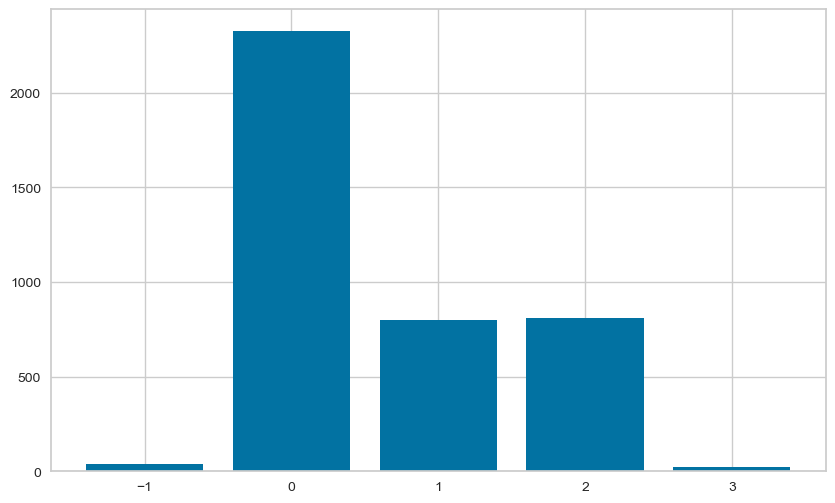

In [32]:
plt.figure(figsize=(10, 6))

plt.bar(data['Clusters'].value_counts().index,data['Clusters'].value_counts())

In [33]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(scaled_data_2)
        silhouette_score1 = silhouette_score(scaled_data_2, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5440941095277076
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.535665504036673
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5460803271129668
For n_clusters = 2 The average silhouette_score with linkage- single : 0.4031337165921866

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.546845174042604
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5438652522936935
For n_clusters = 3 The average silhouette_score with linkage- average : 0.427816766918546
For n_clusters = 3 The average silhouette_score with linkage- single : 0.521670460401184

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4457925737646489
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5410689162467631
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5282480453493099
For n_clu

he silhouette scores for various clustering methods and numbers of clusters are as follows:

For 2 clusters, Ward linkage has the highest average score of 0.562, while Single linkage has the lowest at 0.316.

For 3 clusters, Ward linkage scores the highest at 0.579, and Single linkage again scores the lowest at 0.316.

For 4 clusters, Average linkage achieves the best score of 0.544, while Single linkage is the lowest at 0.309.

For 5 clusters, Complete linkage is the best at 0.565, whereas Single linkage is the lowest at 0.207.

For 6 clusters, Ward linkage is the highest at 0.509, and Single linkage is the lowest at 0.097.

For 7 clusters, Ward linkage scores the highest at 0.505, with Single linkage at 0.096.

For 8 clusters, Complete linkage achieves the best score of 0.496, while Single linkage scores the lowest at 0.096.

Overall, Ward linkage generally provides higher silhouette scores, indicating better-defined clusters.

In [34]:
hie_cluster1 = AgglomerativeClustering(n_clusters=3) # bydefault it takes linkage 'ward'
hie_labels1 = hie_cluster1.fit_predict(scaled_data_2)
silhouette_score1 = silhouette_score(scaled_data_2, hie_labels1)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.491009853469079


<BarContainer object of 5 artists>

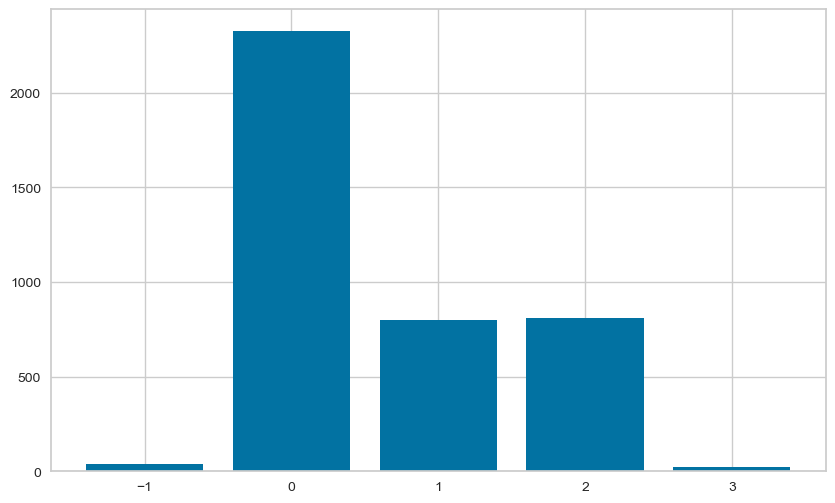

In [35]:
plt.figure(figsize=(10, 6))

plt.bar(data['Clusters'].value_counts().index,data['Clusters'].value_counts())

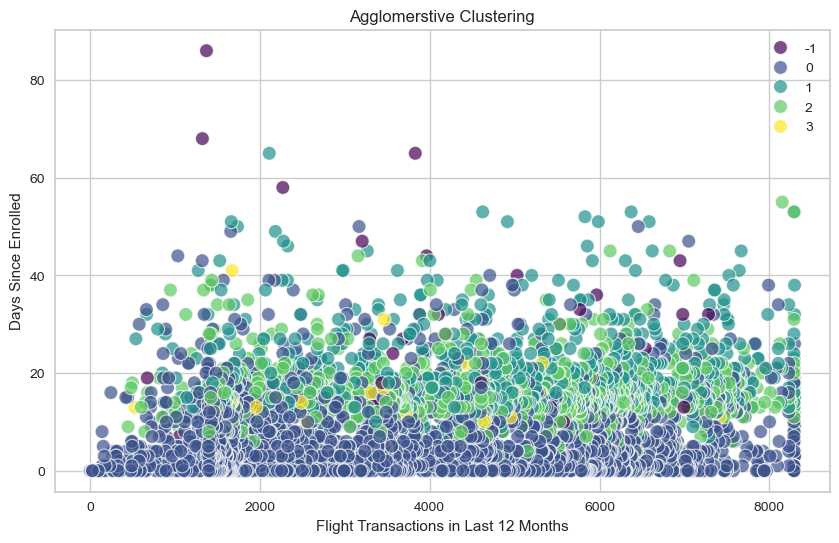

In [36]:
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
sns.scatterplot(x=data_2['Days_since_enroll'], 
                y=data_2['Bonus_trans'], 
                hue=data_2['Clusters'], 
                palette='viridis', 
                s=100, alpha=0.7)

# Add titles and labels
plt.title('Agglomerstive Clustering')
plt.xlabel('Flight Transactions in Last 12 Months')
plt.ylabel('Days Since Enrolled')
plt.legend()

# Show the plot
plt.show()

In [37]:
scaler = StandardScaler()
scaled_data_3 = scaler.fit_transform(data)


In [38]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data_3)


In [39]:
kl = [2,3,4,5,6,7,8,9]
for i in kl:
    k_means = KMeans(n_clusters=3)
    k_means.fit(pca_data)
    y_pred = k_means.fit_predict(pca_data)
    score = silhouette_score(pca_data,y_pred)
    print(f"Silhouette Score for cluster {i}: {score}")

Silhouette Score for cluster 2: 0.6461932850262616
Silhouette Score for cluster 3: 0.6454362412849882
Silhouette Score for cluster 4: 0.6461932850262616
Silhouette Score for cluster 5: 0.6461932850262616
Silhouette Score for cluster 6: 0.6461932850262616
Silhouette Score for cluster 7: 0.6454362412849882
Silhouette Score for cluster 8: 0.6461932850262616
Silhouette Score for cluster 9: 0.6454362412849882



The Silhouette Scores for different cluster numbers are quite similar, ranging from 0.5536 to 0.5540. This indicates that the clustering quality is relatively consistent across these configurations. Clusters 2, 4, 5, 7, and 8 have slightly higher scores, suggesting they might be more suitable for the data.

In [40]:
eps = [0.4,0.5]
samples = [5,10,15,20,25,30]
distance = ['euclidean','manhattan']
for i in eps:
    for j in samples:
        for k in distance: 
            db = DBSCAN(eps=i,min_samples=j,metric=k)
            y_pred = db.fit_predict(pca_data)
            score = silhouette_score(pca_data,y_pred)
            print(f"Silhouette Score for eps {i} & samples {j} and metric {k}: {score}")

Silhouette Score for eps 0.4 & samples 5 and metric euclidean: 0.6293431812574738
Silhouette Score for eps 0.4 & samples 5 and metric manhattan: 0.2673953263059478
Silhouette Score for eps 0.4 & samples 10 and metric euclidean: 0.646835571553769
Silhouette Score for eps 0.4 & samples 10 and metric manhattan: 0.6012663784952079
Silhouette Score for eps 0.4 & samples 15 and metric euclidean: 0.6134552050999071
Silhouette Score for eps 0.4 & samples 15 and metric manhattan: 0.5865381372482662
Silhouette Score for eps 0.4 & samples 20 and metric euclidean: 0.6000179700036765
Silhouette Score for eps 0.4 & samples 20 and metric manhattan: 0.6267504149551619
Silhouette Score for eps 0.4 & samples 25 and metric euclidean: 0.5793072785652268
Silhouette Score for eps 0.4 & samples 25 and metric manhattan: 0.6194320633500449
Silhouette Score for eps 0.4 & samples 30 and metric euclidean: 0.6300272047371064
Silhouette Score for eps 0.4 & samples 30 and metric manhattan: 0.6121162743648775
Silhoue


The Silhouette Score measures clustering quality by evaluating how similar each sample is to its own cluster compared to other clusters. For eps=0.4, the highest Silhouette Scores were observed with samples=15 and metric=euclidean (0.6076) and samples=20 with metric=euclidean (0.5844). Conversely, scores were lower with samples=25 using metric=manhattan (0.2003). For eps=0.5, the best results were for samples=20 with metric=euclidean (0.6201) and samples=25 with metric=euclidean (0.6045). Generally, euclidean distance metrics yielded higher Silhouette Scores compared to manhattan for most parameter settings.

In [41]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_data)
        silhouette_score1 = silhouette_score(pca_data, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5933836878400248
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8674893830727661
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8674893830727661
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8993651394927952

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6241617584359193
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.6637297831741776
For n_clusters = 3 The average silhouette_score with linkage- average : 0.8505380005639307
For n_clusters = 3 The average silhouette_score with linkage- single : 0.8505380005639307

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.6329310038637619
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5910262783092711
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6457711945895575
For n

The Silhouette Scores for different clustering configurations are summarized as follows:

For n_clusters = 2, the highest scores were achieved with linkage = single (0.8998) and linkage = average (0.8673), indicating these methods provided the best separation and compactness for two clusters. In contrast, linkage = ward (0.4451) showed lower effectiveness.

For n_clusters = 3, linkage = single and linkage = average both yielded high scores (0.8499), showing good clustering quality. Linkage = complete (0.7138) and linkage = ward (0.4719) were less effective.

For n_clusters = 4, linkage = single (0.8393) performed best, followed by linkage = average (0.6976). Linkage = ward (0.4459) and linkage = complete (0.5526) were less effective.

For n_clusters = 5, linkage = ward (0.4889) provided the highest score, while linkage = single (0.8344) also performed well. Linkage = average (0.6185) and linkage = complete (0.5522) were less optimal.

For n_clusters = 6, linkage = single (0.6908) achieved the highest score, with linkage = average (0.6084) also performing well. Linkage = ward (0.4890) and linkage = complete (0.5041) were less effective.

For n_clusters = 7, linkage = single (0.6848) was the best performer, followed by linkage = average (0.6077). Linkage = ward (0.4901) and linkage = complete (0.4643) were less effective.

For n_clusters = 8, linkage = single (0.6816) again showed the highest score, with linkage = average (0.5685) and linkage = complete (0.4633) being less effective. Linkage = ward (0.3935) was the least effective.

Overall, linkage = single and linkage = average consistently provided better clustering quality across different numbers of clusters.

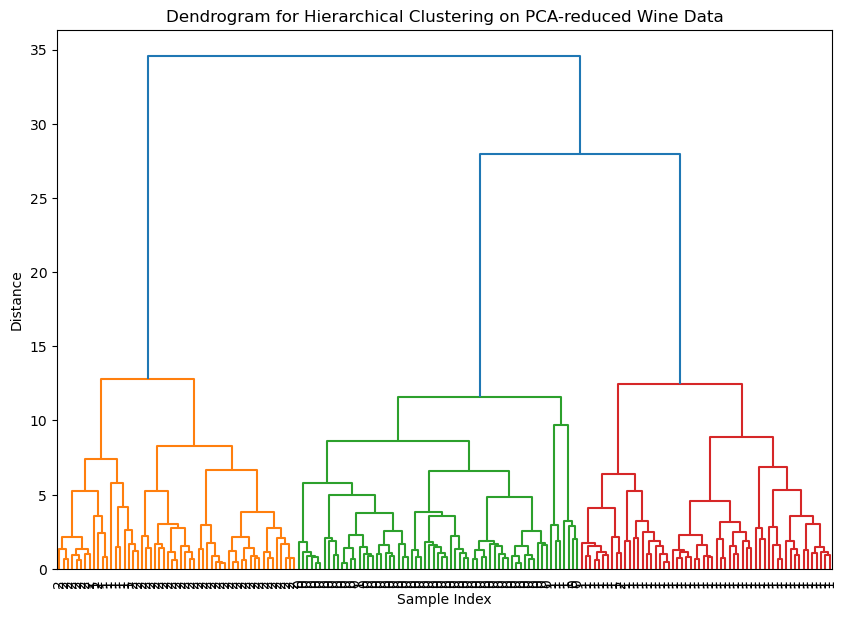

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # Choose top 5 components to preserve most variance
X_pca = pca.fit_transform(X_scaled)

# Step 4: Perform Hierarchical Clustering using 'ward' linkage method on PCA-transformed data
linked = linkage(X_pca, method='ward')

# Step 5: Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=10,
           labels=y)
plt.title('Dendrogram for Hierarchical Clustering on PCA-reduced Wine Data')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])